# Final Report

## Executive Summary

### In recent years, we have seen an upward trend of environmental issues, for example, drought. Even in developed countries, such as US, it has become increasingly important to find ways of minimizing its effects. Analytical methods have been developed in order to identify factors that may contribute to drought. However, rather than analyzing data about the United States as a whole, we have found statistically significant results from analyzing data that is specific to each county (such as the county’s working population distribution across industries).


## Question:
### Given historical factors of chemical concentrations, and countys' earnings, and working population distribution across industries, what is the likely composition of the population affected by differing severities of drought in the upcoming years?


## Why this quetion is important:
### This question is important because it will allow us to reasonably estimate the severity of drought for a given year for each county, which can help the counties better allocate their currently available water resources and prepare for next year’s potential droughts in advance (eg. by pooling water from elsewhere). By building such a model and fitting it to available data, it can also help us better identify potential contributing factors to droughts. We can then provide direction for further research to identify triggers of droughts and potentially reduce the number and severity of future droughts by targeting specific significant factors.


## Key findings & significance:
###    Our approach to this question was to consider a different perspective of analysis. Rather than using conventional means of predicting characteristics of future droughts (such as using geological conditions to predict the regions most susceptible to drought), our results suggest that we may have found an alternative method. Using social-economical data that is specific to each county, a distribution can be generated that closely resembles the actual distribution of percentage values for various ranges of drought severities. Using our machine learning model, we were able to predict drought levels for different counties (with  72.31% accuracy) for the year 2016 when given the required historical data for periods before 2015. Given this result, we expect the model to accurately predict drought levels or future years as well. Comparing the estimated values of drought severity outputted by this model to the actual values for 2016, the Mean Squared Error (MSE) follows a normal distribution with mean of 0 and a standard deviation of 2.67%. During the model development process, we found that the county’s working population distribution across different industries contributed the most to the level of droughts.


## Appendix:

### Future Research Area:
###  Based on the model, we have identified that the county’s working population distribution across different industries contributed the most to the level of droughts. Due to time constraint, we were not able to identify the effect specific industries have on the drought levels. Further research could work on identifying the details of how different industry can affect drought levels and why, so that we can potentially find ways to reduce the negative effects that industries have while maximizing the positive effects (if any). 


## Methodology:
### We interpret all given data for the given period for a given county as a snapshot: at the specific timeframe, we see the chemical content in local waters, earnings and population by industry, and the levels of drought. We know all the other factors may all contribute to the drought level, although we do not know how or how much each contributes. By looking at the historical multi-dimensional data snapshot, we try to identify patterns using machine learning, such that when one of the dimensions are missing, we can use the found pattern to predict the missing occurrence.  



### Data Quality Control:
### For quality control and cleaning the data, we cleaned the data with invalid and empty entries. We also looked at the data fields and ranges to decide which makes sense to be included in our model. Since levels of water usage only have data for 2010, we have decided not to use it.
###  Common Errors Handling: Model Overfitting
### We trained the network against separate tensor of different data to determine which group of data has the most influence, and to find out which causes overfitting. We experimented with different network structures and numbers of layers to reduce overfitting.
### Transforming the Datasets
### Out of all the data sets, only the data for droughts list specific dates, whereas other datasets list only the year. Thus, we decided to only consider the year to ensure that our datasets would be comparable.
### Feature Engineering
### We used neural network to extract features from a huge tensor consisting of all the data. Visualized true and prediction values to find cluster, so that we can identify trends and patterns.
### Exploratory Data Analysis
### we visualized the training loss and validation loss of the network against separate tensor of multiple combinations of data (chemicals, earnings, industry_occupation), we noticed that earnings have small correlation.
### Assumptions and Decisions
### At the beginning, we assume that given the multi-dimensional data of a county, it can provide a strong enough representation of the county, which will enable us to find trends in relation to drought. We also assume the trend we find will persist into the future to keep our model relevant.
### Feature Selection
### We split the data into 2 group for training and testing, every data dated before 2015 is used for training and every data dated after 2015 is used for testing. 



## Final Conclusion
### In conclusion, our approach to this question was to consider a different perspective of analysis. Rather than using conventional means of predicting characteristics of future droughts (such as using geological conditions to predict the regions most susceptible to drought), our results suggest that we may have found an alternative method. Using social-economical data that is specific to each county, a distribution can be generated that closely resembles the actual distribution of percentage values for various ranges of drought severities. Using our machine learning model, we were able to predict drought levels for different counties (with  72.31% accuracy) for the year 2016 when given the required historical data for periods before 2015. Given this result, we expect the model to accurately predict drought levels or future years as well. Comparing the estimated values of drought severity outputted by this model to the actual values for 2016, the Mean Squared Error (MSE) follows a normal distribution with mean of 0 and a standard deviation of 2.67%. During the model development process, we found that the county’s working population distribution across different industries contributed the most to the level of droughts.

#### Imports libraries

In [12]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import json
from numpy import array
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

### Fig 1 - the high correlation between training loss and validation loss shows that our model doesn't have overfitting
### Fig 2 - for extreme independent variables, we also have more extreme reactions from dependent variables
### Fig 3 - mean square error of our model follows a normal distribution with mean of 0 and standard deviation of 2.67%.

### Feed Tensors with chemicals data, earnings data, industry_occupation data.

[[  3.60270000e+04   5.00000000e-01   7.00000000e-01 ...,   1.23190000e+04
    2.59770000e+04   6.66440000e+04]
 [  6.06500000e+03   7.50000000e-01   3.20000000e+00 ...,   1.63460000e+04
    2.17100000e+04   6.41580000e+04]
 [  4.20790000e+04   7.50000000e-01   7.00000000e-01 ...,   1.35020000e+04
    2.22720000e+04   5.21560000e+04]
 ..., 
 [  4.20210000e+04   1.00000000e-01   7.00000000e-01 ...,   1.13320000e+04
    2.14840000e+04   4.67600000e+04]
 [  4.20270000e+04   1.00000000e-01   5.00000000e-01 ...,   1.20250000e+04
    2.17910000e+04   4.87310000e+04]
 [  2.12270000e+04   5.00000000e-01   5.00000000e+00 ...,   1.21560000e+04
    1.92740000e+04   4.14500000e+04]]
[[ 0.46182861 -0.21997535 -0.30131383 ..., -0.54252738  0.76214464
   1.09263499]
 [-1.59175401 -0.15924512  0.5754385  ...,  0.85406887 -0.55873348
   0.87084531]
 [ 0.8766301  -0.15924512 -0.30131383 ..., -0.13225339 -0.38476265
  -0.19991885]
 ..., 
 [ 0.8726548  -0.31714372 -0.30131383 ..., -0.88482698 -0.62869327


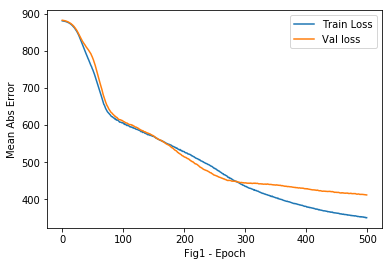

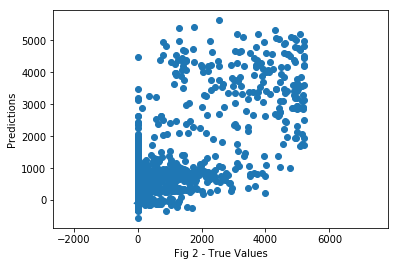

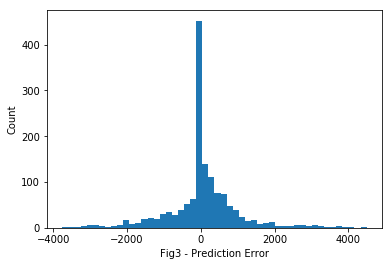

In [40]:
with open('chem_2.json') as f:
    chem_data = json.load(f)

with open('drought.json') as f:
    drought_data = json.load(f)

with open('industry_occupation.json') as f:
    indus_data = json.load(f)

with open('earnings.json') as f:
    earning_data = json.load(f)



train_data = []
train_labels = []

test_data = []
test_labels = []

for fip in drought_data:
    for year in drought_data:
        if fip not in chem_data or year not in chem_data[fip]:
            continue
        if fip not in indus_data or year not in indus_data[fip]:
            continue
        if fip not in earning_data or year not in earning_data[fip]:
            continue

        data = []
        data.append(int(fip))
        data.extend(chem_data[fip][year])

        for data123 in indus_data[fip][year]:
            data.append(int(data123))

        for data123 in earning_data[fip][year]:
            if isinstance(data123, str):
                data123  = data123.replace('+', '').replace(',', '').replace('-', '')
            data.append(int(data123))

        label = drought_data[fip][year]

        if int(year) < 2015:
            train_data.append(data)
            train_labels.append(label)
        else:
            test_data.append(data)
            test_labels.append(label)

train_data = array(train_data)
train_labels = array(train_labels)

test_data = array(test_data)
test_labels = array(test_labels)

print(test_data)

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

print(test_data)
#print(train_data)
#print(test_data)

def get_length(map_data):
    for fip in map_data:
        for year in map_data[fip]:
            return len(map_data[fip][year])

dim = 1 + get_length(indus_data) + get_length(earning_data) + get_length(chem_data)

def build_model():
    model = keras.Sequential([
    keras.layers.Dense(dim , activation=tf.nn.relu,
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(dim, activation=tf.nn.relu),
    keras.layers.Dense(6)
    ])
    optimizer = tf.train.RMSPropOptimizer(0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae','acc'])
    return model

model = build_model()
EPOCHS = 500

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])


model.summary()

def plot_history(history):
    plt.figure()
    plt.xlabel('Fig1 - Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.show()

plot_history(history)




test_predictions = model.predict(test_data).flatten()
plt.scatter(test_labels, test_predictions)
plt.xlabel('Fig 2 - True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()


error = test_predictions - test_labels.flatten()
plt.hist(error, bins = 50)
plt.xlabel("Fig 3 - Prediction Error")
plt.ylabel("Count")
plt.show()

### Feed tensors with chemical data

[[  2.01590000e+04   0.00000000e+00   0.00000000e+00 ...,   1.90000000e+00
    2.50000000e+01   5.60000000e+00]
 [  4.20550000e+04   7.50000000e-01   5.00000000e-01 ...,   9.30000000e-01
    4.02500000e+01   3.96300000e+01]
 [  2.90850000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  2.12150000e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    2.09400000e+01   1.07400000e+01]
 [  2.12270000e+04   5.00000000e-01   5.00000000e+00 ...,   2.20000000e+00
    4.23400000e+01   3.89200000e+01]
 [  5.30190000e+04   2.84000000e+01   5.00000000e-01 ...,   1.40000000e-01
    2.18800000e+01   4.28000000e+00]]
[[-0.68885611 -0.25943519 -0.55535712 ...,  0.5950365   0.05240832
  -0.39937775]
 [ 0.91505234 -0.10651002 -0.35710331 ..., -0.02470081  0.61757405
   1.38032159]
 [-0.03501583 -0.25943519 -0.55535712 ..., -0.61888195 -0.87409287
  -0.69224628]
 ..., 
 [-0.61150283 -0.25943519 -0.55535712 ..., -0.61888195 -0.09805547


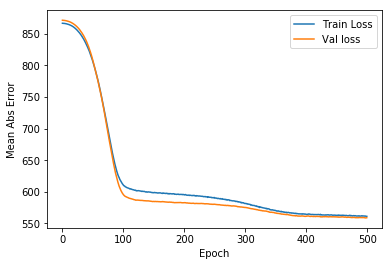

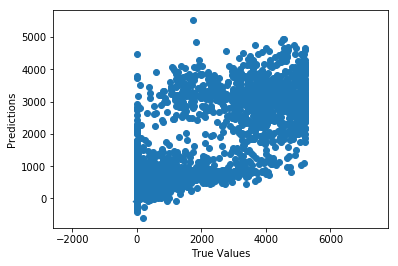

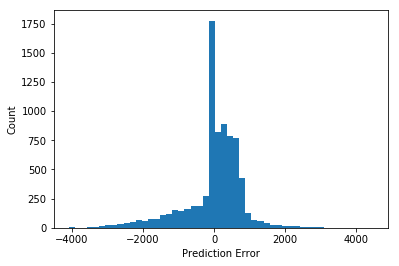

In [35]:
%matplotlib inline

with open('chem_2.json') as f:
    chem_data = json.load(f)

with open('drought.json') as f:
    drought_data = json.load(f)

train_data = []
train_labels = []

test_data = []
test_labels = []

counter = 0
for fip in drought_data:
    for year in drought_data:
        if fip not in chem_data or year not in chem_data[fip]:
            continue
        data = []
        data.append(int(fip))
        counter += 1
        data.extend(chem_data[fip][year])

        label = drought_data[fip][year]

        if int(year) < 2015:
            train_data.append(data)
            train_labels.append(label)
        else:
            test_data.append(data)
            test_labels.append(label)

train_data = array(train_data)
train_labels = array(train_labels)

test_data = array(test_data)
test_labels = array(test_labels)

print(test_data)

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

print(test_data)
#print(train_data)
#print(test_data)

def get_length(map_data):
    for fip in map_data:
        for year in map_data[fip]:
            return len(map_data[fip][year])

dim = 1 + get_length(chem_data)

def build_model():
    model = keras.Sequential([
    keras.layers.Dense(dim , activation=tf.nn.relu,
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(dim, activation=tf.nn.relu),
    keras.layers.Dense(6)
    ])
    optimizer = tf.train.RMSPropOptimizer(0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'acc'])
    return model

model = build_model()
EPOCHS = 500

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])


model.summary()

def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.show()

plot_history(history)




test_predictions = model.predict(test_data).flatten()
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()


error = test_predictions - test_labels.flatten()
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()

### Feed tensors with earnings data

[[39025 36378 30511 ..., 12859 24920 50700]
 [36027 40225 29643 ..., 12319 25977 66644]
 [24015 41020 25983 ..., 14357 28686 69671]
 ..., 
 [ 2188 38618 52344 ..., 26103 30000 47875]
 [42027 31217 32959 ..., 12025 21791 48731]
 [21227 27528 24345 ..., 12156 19274 41450]]
[[ 0.57230931  0.21305672 -0.15006474 ..., -0.22351801  0.36555964
  -0.11531725]
 [ 0.37294384  0.79015795 -0.21583354 ..., -0.40122807  0.62931708
   1.27254449]
 [-0.425848    0.90941854 -0.49315361 ...,  0.26946286  1.30530469
   1.53603279]
 ..., 
 [-1.87733232  0.54908655  1.50423283 ...,  4.13498573  1.63319236
  -0.36122225]
 [ 0.77194077 -0.56116201  0.03542147 ..., -0.49798132 -0.41523225
  -0.28671086]
 [-0.61124857 -1.11456114 -0.61726571 ..., -0.45487018 -1.04330933
  -0.92049293]]

....................................................................................................
....................................................................................................
.........................

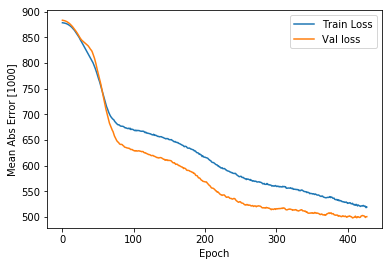

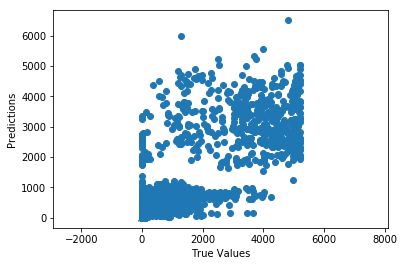

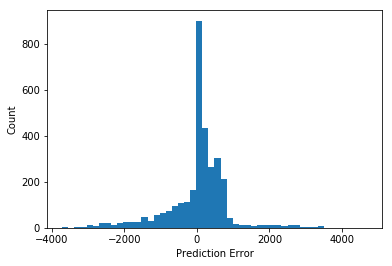

In [36]:
with open('drought.json') as f:
    drought_data = json.load(f)

with open('earnings.json') as f:
    earning_data = json.load(f)


train_data = []
train_labels = []

test_data = []
test_labels = []

for fip in drought_data:
    for year in drought_data:
        if fip not in earning_data or year not in earning_data[fip]:
            continue

        data = []
        data.append(int(fip))

        for data123 in earning_data[fip][year]:
            if isinstance(data123, str):
                data123  = data123.replace('+', '').replace(',', '').replace('-', '')
            data.append(int(data123))

        label = drought_data[fip][year]

        if int(year) < 2015:
            train_data.append(data)
            train_labels.append(label)
        else:
            test_data.append(data)
            test_labels.append(label)

train_data = array(train_data)
train_labels = array(train_labels)

test_data = array(test_data)
test_labels = array(test_labels)

print(test_data)

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

print(test_data)
#print(train_data)
#print(test_data)

def get_length(map_data):
    for fip in map_data:
        for year in map_data[fip]:
            return len(map_data[fip][year])

dim = 1 + get_length(earning_data)

def build_model():
    model = keras.Sequential([
    keras.layers.Dense(dim , activation=tf.nn.relu,
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(dim, activation=tf.nn.relu),
    keras.layers.Dense(6)
    ])
    optimizer = tf.train.RMSPropOptimizer(0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

model = build_model()
EPOCHS = 500

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])


model.summary()

def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.show()

plot_history(history)




test_predictions = model.predict(test_data).flatten()
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()


error = test_predictions - test_labels.flatten()
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()

### Feed tensors with industry_occupation

[[ 42055  72077   2261 ...,   5341   4293   5406]
 [ 39025 102650    289 ...,   9623   5514   3567]
 [ 36027 144424   1998 ...,  12696   7951   6797]
 ..., 
 [ 42027  76548    738 ...,   9823   3547   3006]
 [ 36065 101094   1758 ...,   8597   5029   7895]
 [ 21227  62992    466 ...,   7248   2735   1915]]
[[ 0.78549348 -0.3468718   0.01197859 ..., -0.37371537 -0.26346788
  -0.21120297]
 [ 0.58784962 -0.2392516  -0.41206655 ..., -0.23515064 -0.18727355
  -0.37234446]
 [ 0.39229309 -0.09220271 -0.0445751  ..., -0.13570892 -0.03519691
  -0.08931727]
 ..., 
 [ 0.78366707 -0.33113341 -0.31551672 ..., -0.22867867 -0.31002067
  -0.42150182]
 [ 0.39477179 -0.24472889 -0.09618303 ..., -0.26835181 -0.21753911
   0.00689445]
 [-0.57309606 -0.37885196 -0.3740057  ..., -0.3120052  -0.36069208
  -0.51710017]]

....................................................................................................
..........................................................................................

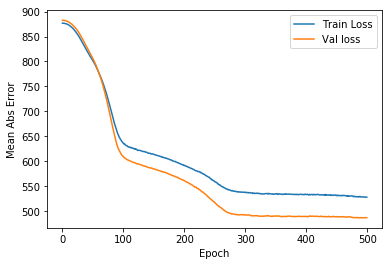

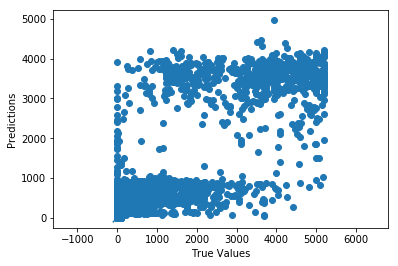

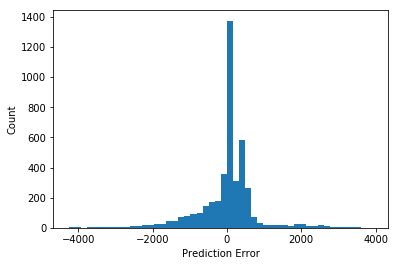

In [37]:
with open('drought.json') as f:
    drought_data = json.load(f)

with open('industry_occupation.json') as f:
    indus_data = json.load(f)



train_data = []
train_labels = []

test_data = []
test_labels = []

for fip in drought_data:
    for year in drought_data:
        if fip not in indus_data or year not in indus_data[fip]:
            continue
        data = []
        data.append(int(fip))

        for data123 in indus_data[fip][year]:
            data.append(int(data123))

        label = drought_data[fip][year]

        if int(year) < 2015:
            train_data.append(data)
            train_labels.append(label)
        else:
            test_data.append(data)
            test_labels.append(label)

train_data = array(train_data)
train_labels = array(train_labels)

test_data = array(test_data)
test_labels = array(test_labels)

print(test_data)

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

print(test_data)
#print(train_data)
#print(test_data)

def get_length(map_data):
    for fip in map_data:
        for year in map_data[fip]:
            return len(map_data[fip][year])

dim = 1 + get_length(indus_data)

def build_model():
    model = keras.Sequential([
    keras.layers.Dense(dim , activation=tf.nn.relu,
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(dim, activation=tf.nn.relu),
    keras.layers.Dense(6)
    ])
    optimizer = tf.train.RMSPropOptimizer(0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

model = build_model()
EPOCHS = 500

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])


model.summary()

def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.show()

plot_history(history)




test_predictions = model.predict(test_data).flatten()
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()


error = test_predictions - test_labels.flatten()
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()